## Advanced Classification


In [19]:
%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from itertools import cycle
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import tree
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve
from scikitplot.metrics import plot_roc

LOAD

In [3]:
#df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_SenzaOutlier.csv') 
df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_post_encoding.csv') 
df.shape

(87950, 24)

In [4]:
df = df.drop([ 'popularity','valence', 'energy'], axis = 1)  #'valence', 'energy',
df.head()

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,nervous
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,bored
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,nervous
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,nervous
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,nervous


In [5]:
from sklearn.preprocessing import LabelEncoder

# Inizializza il LabelEncoder
label_encoder = LabelEncoder()

# Codifica le etichette di emozione nel DataFrame
df['emotion'] = label_encoder.fit_transform(df['emotion'])
df

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,5
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,1
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,5
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,5
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87945,-0.061779,-0.564232,1.637100,0.608776,-0.940847,1.534564,1.111459,1.736284,0.934902,0.787971,...,-1.805076,0.718447,1.320089,1.250663,1,5,0,4,0.003343,3
87946,-0.110350,0.581802,0.936856,-1.645092,0.136492,-0.616040,-1.018318,-0.756126,0.878487,0.787971,...,0.134011,-0.458242,-0.067569,-0.300284,1,9,1,4,0.003343,5
87947,-0.235874,1.424137,0.749566,-0.122951,-0.736753,-0.605343,-0.200804,0.255855,1.216979,0.634326,...,-0.992088,-0.027072,1.929533,1.725765,1,11,0,4,0.003343,7
87948,-0.073532,0.507310,1.449257,-0.592442,0.139463,-0.616016,-2.392504,-0.483129,0.672737,0.787971,...,0.513040,-0.340721,-0.320723,-0.301306,0,0,1,4,0.003343,3


In [6]:

# Costruisci il mapping
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Stampa il mapping
print("Mapping delle emozioni:")
for emotion, code in mapping.items():
    print(f"{emotion}: {code}")

# Decodifica un esempio
decoded_code = 1  # Esempio di codice da decodificare
decoded_emotion = label_encoder.inverse_transform([decoded_code])[0]
print(f"\nDecodificato il codice {decoded_code}: {decoded_emotion}")


Mapping delle emozioni:
angry: 0
bored: 1
calm: 2
excited: 3
happy: 4
nervous: 5
peaceful: 6
pleased: 7
relaxed: 8
sad: 9
sleepy: 10

Decodificato il codice 1: bored


In [7]:
mapping

{'angry': 0,
 'bored': 1,
 'calm': 2,
 'excited': 3,
 'happy': 4,
 'nervous': 5,
 'peaceful': 6,
 'pleased': 7,
 'relaxed': 8,
 'sad': 9,
 'sleepy': 10}

In [8]:
df['emotion'].value_counts()

emotion
2     18414
3     13309
4     11751
0      9847
7      8842
1      7145
5      7077
9      5924
8      3136
10     2055
6       450
Name: count, dtype: int64

PARTITION

In [9]:
attributes = [col for col in df.columns if col != "emotion"]

X = df[attributes].values
y = np.array(df["emotion"])  # oppure y = df['emotion].values

X.shape, y.shape

((87950, 20), (87950,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Usando l'opzione stratify=y, garantisci che la suddivisione mantenga la stessa proporzione di classi tra set di addestramento e di test, utile quando hai un set di dati sbilanciato

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70360, 20), (17590, 20), (70360,), (17590,))

## LOGISTIC REGRESSION

- posso usarla per multiclasse?\
Sì, la regressione logistica può essere estesa per gestire problemi di classificazione multiclasse. La versione standard della regressione logistica è comunemente utilizzata per problemi di classificazione binaria, ma esistono approcci per adattarla ai casi con più di due classi. Due degli approcci più comuni sono l'uno-contro-tutti (one-vs-all) e l'uno-contro-uno (one-vs-one).


In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’.



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scikitplot.metrics import plot_roc, plot_precision_recall

In [12]:
#logistic regression senza paramatri

# DEFAULT C=1.0, penalty='l2', solver='lbfgs'
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy 0.429619101762365
F1-score 0.40910771638808396
              precision    recall  f1-score   support

           0       0.55      0.49      0.51      1970
           1       0.47      0.31      0.37      1429
           2       0.38      0.63      0.47      3683
           3       0.40      0.44      0.42      2662
           4       0.42      0.44      0.43      2350
           5       0.37      0.19      0.25      1415
           6       0.11      0.02      0.04        90
           7       0.39      0.12      0.19      1768
           8       0.36      0.15      0.21       627
           9       0.65      0.78      0.71      1185
          10       0.32      0.21      0.26       411

    accuracy                           0.43     17590
   macro avg       0.40      0.35      0.35     17590
weighted avg       0.43      0.43      0.41     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GRID SEARCH

In [26]:
#1 - 'ovr'

#run in 3 min

model = LogisticRegression(random_state=42) 

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
    'multi_class': ['ovr']
}

random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca casuale sulla griglia sul training set
random_search.fit(X_train, y_train)

# Visualizza i parametri ottimizzati
print("Migliori parametri:", random_search.best_params_)
print("Miglior score: ", random_search.best_score_)

c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HUAWEI\anaconda3

Migliori parametri: {'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10}
Miglior score:  0.4227117680500284


In [27]:
lr1 = random_search.best_estimator_
lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=mapping)) 

c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

Accuracy 0.41796475270039796
F1-score 0.3732601002449637
              precision    recall  f1-score   support

       angry       0.50      0.54      0.52      1970
       bored       0.54      0.12      0.19      1429
        calm       0.35      0.74      0.48      3683
     excited       0.41      0.41      0.41      2662
       happy       0.43      0.44      0.43      2350
     nervous       0.34      0.14      0.20      1415
    peaceful       0.14      0.01      0.02        90
     pleased       0.38      0.06      0.10      1768
     relaxed       0.33      0.05      0.09       627
         sad       0.66      0.79      0.72      1185
      sleepy       0.31      0.04      0.07       411

    accuracy                           0.42     17590
   macro avg       0.40      0.30      0.29     17590
weighted avg       0.42      0.42      0.37     17590



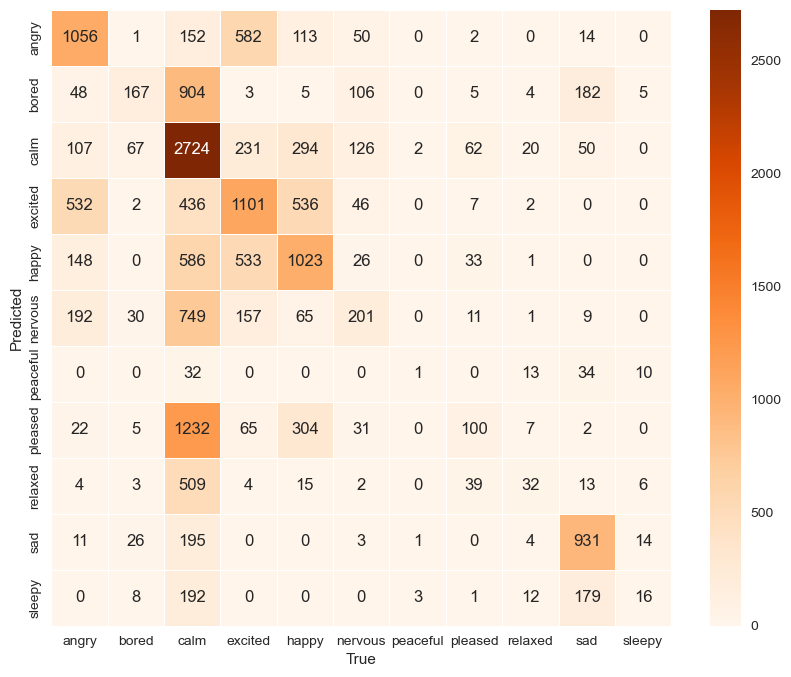

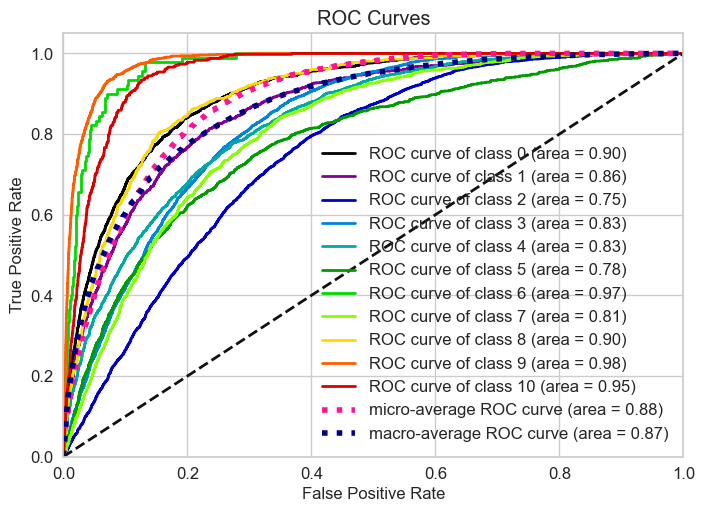

0.8692040032912157


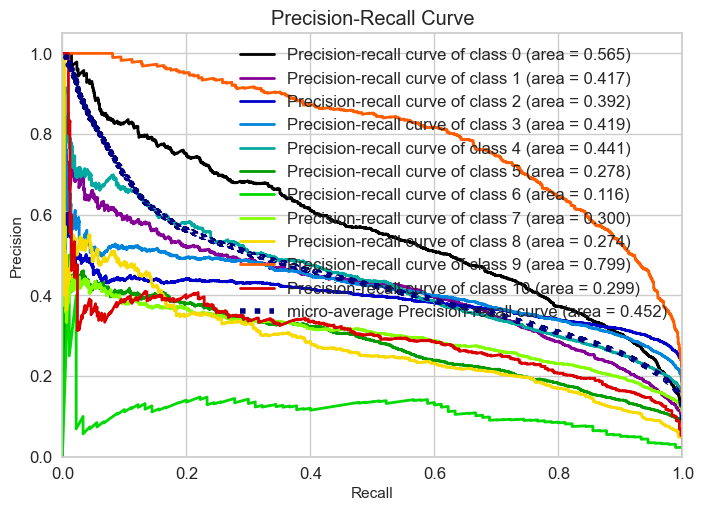

In [28]:
cm = confusion_matrix(y_test, y_pred)
# Plot della matrice di confusione
plt.figure(figsize=(10, 8))  # Imposta le dimensioni del plot
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", xticklabels=mapping, yticklabels=mapping, linewidths=0.5) 
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC CURVE, anche se linearSVM non ha la predict_proba
y_pred_proba = lr1.predict_proba(X_test)
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, lr1.predict_proba(X_test), )
plt.show()
print(roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

In [29]:
#2 - 'multinomial'

#run in 8

model = LogisticRegression(random_state=42) 

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
    'multi_class': ['multinomial']
}

random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca casuale sulla griglia sul training set
random_search.fit(X_train, y_train)

# Visualizza i parametri ottimizzati
print("Migliori parametri:", random_search.best_params_)
print("Miglior score: ", random_search.best_score_)

c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\

Migliori parametri: {'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1}
Miglior score:  0.4376065946560546


c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [30]:
lr2 = random_search.best_estimator_
lr2.fit(X_train, y_train)

# Valutazione delle performance sul set di test
y_pred = lr2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=mapping)) 

Accuracy 0.4320636725412166
F1-score 0.4129508172225547
              precision    recall  f1-score   support

       angry       0.55      0.49      0.52      1970
       bored       0.46      0.32      0.38      1429
        calm       0.38      0.63      0.47      3683
     excited       0.41      0.45      0.43      2662
       happy       0.42      0.45      0.43      2350
     nervous       0.37      0.19      0.25      1415
    peaceful       0.20      0.04      0.07        90
     pleased       0.38      0.13      0.19      1768
     relaxed       0.37      0.18      0.24       627
         sad       0.66      0.78      0.71      1185
      sleepy       0.33      0.22      0.27       411

    accuracy                           0.43     17590
   macro avg       0.41      0.35      0.36     17590
weighted avg       0.43      0.43      0.41     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


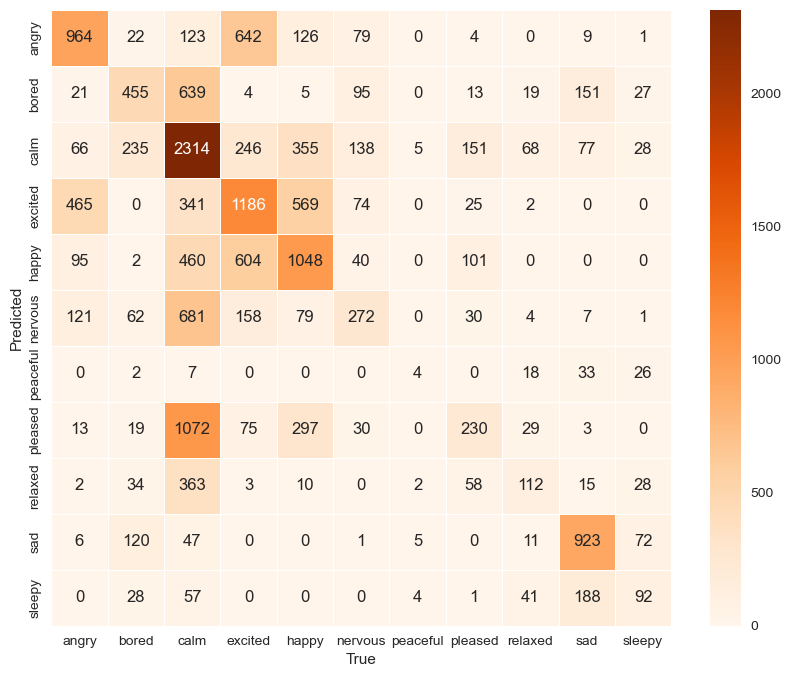

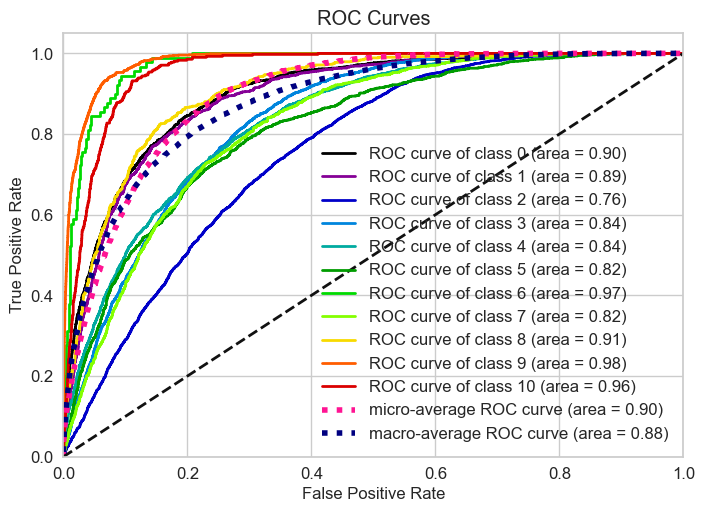

0.8808311935336884


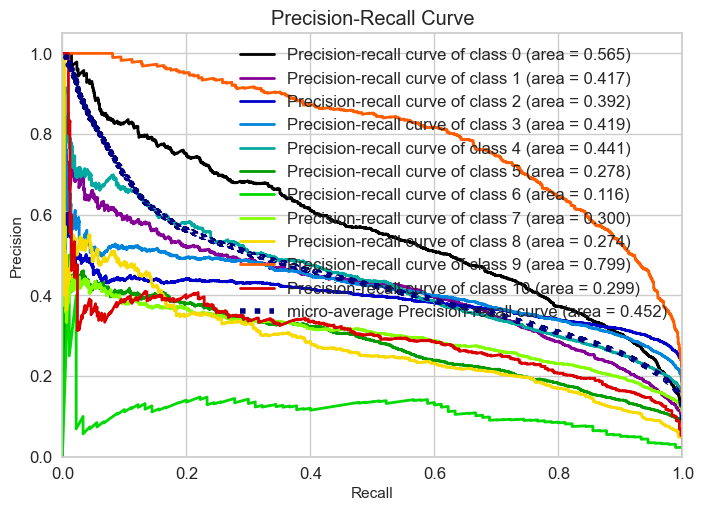

In [31]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))  # Imposta le dimensioni del plot
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", xticklabels=mapping, yticklabels=mapping, linewidths=0.5) 
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()


# ROC CURVE, anche se linearSVM non ha la predict_proba
y_pred_proba = lr2.predict_proba(X_test)
plot_roc(y_test, lr2.predict_proba(X_test), )
plt.show()
print(roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))


# plot della PRECISION-RECALL
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

# SVM

Trova il miglior iperpiano lineare oppure non-lineare che meglio separa i dati delle diverse classi 

Iperpiano che massimizza i margini è il migliore, non troppo vicino ai dati perchè se aggiungo nuove istanze potrebbe sbagliare, devo trovare iperpiano che è più utile nel fare questa separazione

#### Linear SVM

I modelli 'Linear SVM' utilizzano un iperpiano lineare per separare i dati

- parametro C: assunto nei seguenti valori 0.01, 0.1, 1.0, 10.0, 100.0, è un parametro di regolarizazione sul livello di misclassification error che il può avere il modello 

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns

In [52]:
# CASO BASE DI LINEAR SVM C=1.0, penalty=L2

clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))

print(classification_report(y_test, y_pred, target_names=mapping))


In [ ]:

# plot della CONFUSION MATRIX 
cf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del plot
sns.heatmap(cf, annot=True, fmt='d', cmap="Oranges", xticklabels=labels, yticklabels=labels, linewidths=0.5)

plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

#### Random Search per tuning dei parametri migliori 
- penalty
- parametro C
 

In [13]:
#run in 13

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Crea un oggetto LinearSVC
svc = LinearSVC(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'tol': loguniform(1e-6, 1e-2)  # esplora valori di tolleranza tra 1e-6 e 1e-2
}

# Crea un oggetto GridSearchCV con cross-validation a 5 suddivisioni
#grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search = RandomizedSearchCV(svc, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


# Esegui la ricerca dei parametri ottimali
grid_search.fit(X_train, y_train)

# Stampa i risultati
print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^^^^^^^^^^^^^
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 1223, in _fit_l

Migliori parametri:  {'C': 1, 'penalty': 'l2', 'tol': 0.00022956487562322177}
Miglior score:  0.41142694712905054


c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### applico i migliori risultati ottenuti 

In [15]:
# VALORI DI SVM MIGLIORI C=1, penalty=L2

clf = grid_search.best_estimator_
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))

print(classification_report(y_test, y_pred, target_names=mapping))


Accuracy 0.40824332006822056
F1-score 0.34014472411909463
              precision    recall  f1-score   support

       angry       0.45      0.59      0.51      1970
       bored       0.55      0.08      0.14      1429
        calm       0.35      0.75      0.48      3683
     excited       0.40      0.38      0.39      2662
       happy       0.42      0.46      0.44      2350
     nervous       0.33      0.04      0.06      1415
    peaceful       0.00      0.00      0.00        90
     pleased       0.25      0.01      0.01      1768
     relaxed       0.12      0.00      0.01       627
         sad       0.60      0.84      0.70      1185
      sleepy       0.25      0.01      0.02       411

    accuracy                           0.41     17590
   macro avg       0.34      0.29      0.25     17590
weighted avg       0.39      0.41      0.34     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

In [17]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.41242183058556
Accuratezza sul set di test: 0.40824332006822056


c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

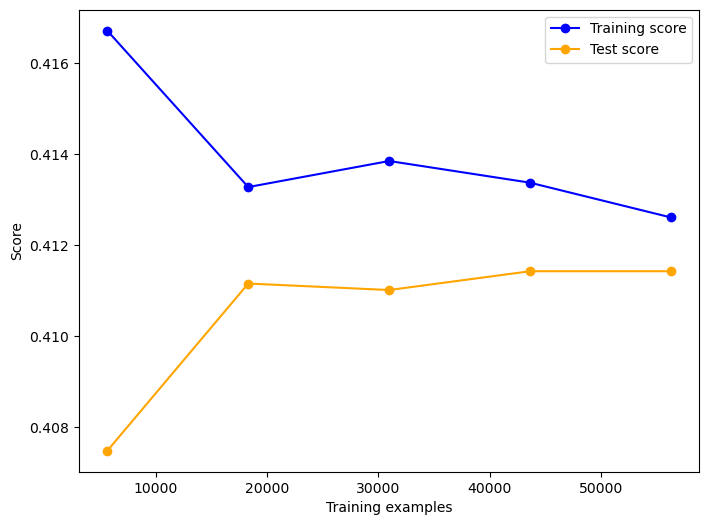

In [20]:
# Disegna le curve di apprendimento per valutare le prestazioni del modello al variare della dimensione 
# del set di addestramento e confronta le prestazioni sul set di addestramento e di test.


plt.figure(figsize=(8, 6))  # Modifica le dimensioni come desiderato (larghezza, altezza)
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color = 'blue')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Test score', color= 'orange')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


grafici, ROC curve, precision-recall curve

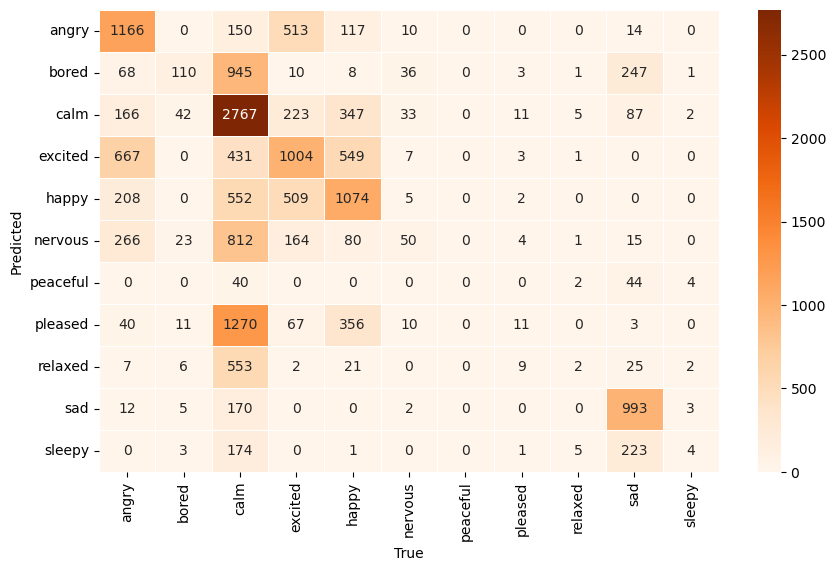

In [21]:
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns

# plot della CONFUSION MATRIX 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del plot
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", xticklabels=mapping, yticklabels=mapping, linewidths=0.5)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()


# Nonlinear SVM


In [22]:
from sklearn.svm import SVC

### Caso base, c=1.0 e kernel='rbf', gamma=scale

Il parametro `probability` nella classe `SVC` di scikit-learn indica se il classificatore deve abilitare il calcolo delle probabilità di appartenenza delle osservazioni a ciascuna classe. Di default, questo parametro è impostato su `False`, il che significa che il classificatore SVM non calcola le probabilità delle previsioni.

Quando `probability=True`, il classificatore SVM addestrato calcolerà le probabilità di appartenenza alle classi utilizzando una funzione di calibrazione delle probabilità. Questo è utile se hai bisogno di valutare la confidenza delle previsioni o se desideri utilizzare il classificatore SVM come parte di un insieme di modelli in un contesto di classificazione probabilistica.

Puoi utilizzare le probabilità calcolate per valutare la fiducia del classificatore nelle sue previsioni o per applicazioni come la curva di ROC (Receiver Operating Characteristic) o la curva di precision-recall.

Ad esempio, se desideri calcolare le probabilità delle previsioni con un classificatore SVM abilitato per le probabilità, puoi farlo usando il metodo `predict_proba()`. Tuttavia, tieni presente che abilitare il calcolo delle probabilità può richiedere più risorse computazionali durante l'addestramento e l'uso del modello.

In [ ]:
#ci ha messo 67 minuti

clf = SVC(random_state=42)  #, probability=True
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=mapping))


In [ ]:
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns

# plot della CONFUSION MATRIX 
cf3 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del plot
sns.heatmap(cf3, annot=True, fmt='d', cmap="Oranges", xticklabels=mapping, yticklabels=mapping, linewidths=0.5)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

# plot della ROC CURVE 
y_pred_proba = clf.predict_proba(X_test)
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print('roc_auc_score',roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

### Adesso a partire dal caso base, faccio una grid search con tutto per vedere caso migliore tra tutti 

param : (kernel, c, gamma)

In [23]:
#run in 184 min

svc_grid = SVC(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel':['rbf', 'poly', 'sigmoid'],
    'gamma': loguniform(1e-4, 1e1), # gamma tra 0.0001 e 10 per i kernel 'rbf', 'poly', e 'sigmoid'
    'degree': [2, 3, 4, 5]          # grado del polinomio per il kernel 'poly'
}

grid_search = RandomizedSearchCV(svc_grid, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca dei parametri ottimali
grid_search.fit(X_train, y_train)

# Stampa i risultati
print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

Migliori parametri:  {'C': 1, 'degree': 2, 'gamma': 0.04781374425325464, 'kernel': 'rbf'}
Miglior score:  0.47757248436611704


In [24]:
svc_grid = grid_search.best_estimator_
svc_grid.fit(X_train, y_train)

y_pred = svc_grid.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=mapping))


Accuracy 0.47737350767481523
F1-score 0.4592356940439056
              precision    recall  f1-score   support

       angry       0.58      0.52      0.55      1970
       bored       0.56      0.34      0.42      1429
        calm       0.40      0.70      0.51      3683
     excited       0.45      0.49      0.47      2662
       happy       0.48      0.49      0.48      2350
     nervous       0.45      0.23      0.31      1415
    peaceful       0.88      0.17      0.28        90
     pleased       0.52      0.23      0.32      1768
     relaxed       0.58      0.12      0.20       627
         sad       0.68      0.81      0.74      1185
      sleepy       0.43      0.20      0.27       411

    accuracy                           0.48     17590
   macro avg       0.55      0.39      0.41     17590
weighted avg       0.50      0.48      0.46     17590



In [26]:
import joblib

# Salvare il modello addestrato
joblib.dump(svc_grid, 'svc_BestModel.joblib')

# # Caricare il modello salvato
# clf = joblib.load('svc_model.joblib')
# clf

['svc_BestModel.joblib']

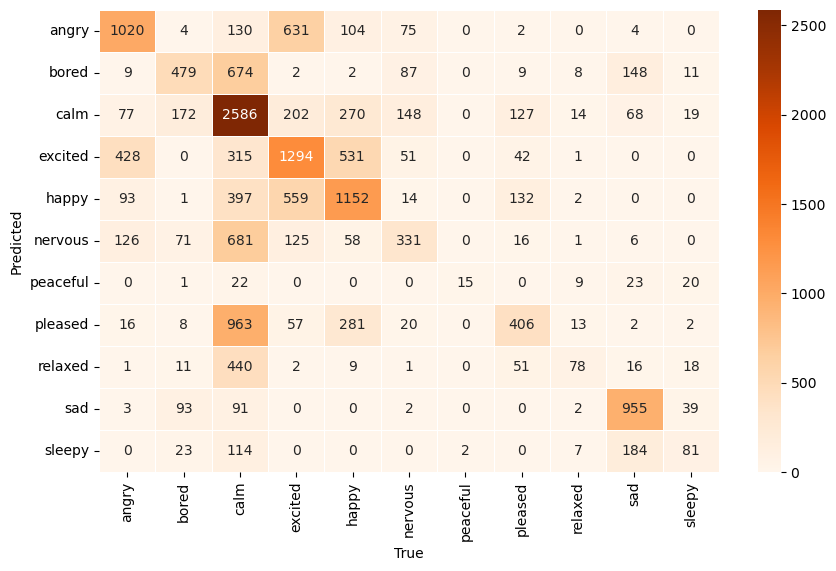

In [27]:
# plot della CONFUSION MATRIX 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))  # Imposta le dimensioni del plot
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", xticklabels=mapping, yticklabels=mapping, linewidths=0.5)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show() 

In [ ]:
#no senza paramtro probability nel SVC


# ROC CURVE
y_pred_proba = svc_grid.predict_proba(X_test)


plot_roc(y_test, svc_grid.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, svc_grid.predict_proba(X_test))
plt.show()

In [28]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, svc_grid.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.5194144400227402
Accuratezza sul set di test: 0.47737350767481523


prova bilanciamento su linear

In [29]:
#Prova bilanciamento
from imblearn.combine import SMOTEENN, SMOTETomek

In [30]:
df['emotion'].value_counts()

emotion
2     18414
3     13309
4     11751
0      9847
7      8842
1      7145
5      7077
9      5924
8      3136
10     2055
6       450
Name: count, dtype: int64

In [31]:
# Utilizza SMOTETomek per bilanciare le classi

smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({6: 14731, 10: 14727, 8: 14725, 9: 14716, 1: 14671, 5: 14624, 7: 14526, 0: 14519, 4: 14363, 3: 14236, 2: 14079})


In [32]:
#run in 39

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Crea un oggetto LinearSVC
svc = LinearSVC(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'tol': loguniform(1e-6, 1e-2)  # esplora valori di tolleranza tra 1e-6 e 1e-2
}

grid_search = RandomizedSearchCV(svc, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_res, y_res)

print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^^^^^^^^^^^^^
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 1223, in _fit_l

Migliori parametri:  {'C': 1, 'penalty': 'l2', 'tol': 5.516364895117933e-06}
Miglior score:  0.43022332461919294


c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### applico i migliori risultati ottenuti 

In [35]:
clf_bal = grid_search.best_estimator_
clf_bal.fit(X_res, y_res)


y_pred = clf_bal.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))

print(classification_report(y_test, y_pred, target_names=mapping))


Accuracy 0.3455940875497442
F1-score 0.3141621986299347
              precision    recall  f1-score   support

       angry       0.43      0.71      0.53      1970
       bored       0.34      0.30      0.32      1429
        calm       0.42      0.06      0.11      3683
     excited       0.41      0.19      0.26      2662
       happy       0.38      0.58      0.46      2350
     nervous       0.23      0.41      0.30      1415
    peaceful       0.08      0.71      0.15        90
     pleased       0.30      0.20      0.24      1768
     relaxed       0.16      0.29      0.21       627
         sad       0.59      0.75      0.66      1185
      sleepy       0.15      0.26      0.19       411

    accuracy                           0.35     17590
   macro avg       0.32      0.40      0.31     17590
weighted avg       0.38      0.35      0.31     17590



c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [36]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_res, clf_bal.predict(X_res))
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.43243057335993046
Accuratezza sul set di test: 0.3455940875497442
